In [7]:
import os 
import numpy as np
from PIL import Image

 
import imageio as iio

os.environ["OPENCV_IO_ENABLE_OPENEXR"]="1"
# importing OpenCV(cv2) module
import cv2
# Save image in set directory
# Read RGB image
 
# read an image 
 

im_path = r"C:\\users\\Pedro\\Desktop\\Universidad\\TFM\\OpenGL\\sRAT-RT\\resources\\screenshots"

def load_image(path):
    # img = iio.imread(path)
    # img = Image.open(path)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return np.array(img)

def load_exr(path):
    img = cv2.imread(path, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def hdr_to_ldr(img, exposure=1.0, out_dtype=np.uint8):

    img *= exposure # exposure if needed
    img = img**(1/2.2) # gamma correction
    # clip
    img = np.clip(img, 0, 1)
    return (img * 255).astype(out_dtype)

names = ["spheres_d65_360_830_200_rgb", "spheres_d65_360_830_200_naive", "spheres_d65_360_830_200_spec"]

images = [load_image(os.path.join(im_path, f"{name}.png")) for name in names]


ref = "mi_D65.exr"
ref_path = os.path.join(im_path, ref)
ref_im = load_exr(ref_path)


ref_im_ldr = hdr_to_ldr(ref_im, exposure=1.0) 
#np.power((ref_im * 255), 1.0/2.2)

print(ref_im.shape, ref_im.dtype, ref_im.max())
print(ref_im_ldr.shape, ref_im_ldr.dtype, ref_im_ldr.max())
print(images[0].shape, images[0].dtype, images[0].max())

# ref_im = 3*255*load_image(os.path.join(im_path, ref))

# ref_im = 1.0*ref_im/np.max(ref_im)

(1080, 1920, 3) float32 0.27001953
(1080, 1920, 3) uint8 140
(1080, 1920, 3) uint8 152


C:\Users\Pedro\AppData\Local\Temp\ipykernel_14084\2343537918.py:34: RuntimeWarning: invalid value encountered in power
  img = img**(1/2.2) # gamma correction
C:\Users\Pedro\AppData\Local\Temp\ipykernel_14084\2343537918.py:37: RuntimeWarning: invalid value encountered in cast
  return (img * 255).astype(out_dtype)


In [8]:
import matplotlib.pyplot as plt

def plot_cmp(images, ref_im_ldr, names, suptitle):
    aspect = ref_im_ldr.shape[1]/ref_im_ldr.shape[0]
    fig, axs = plt.subplots(2, 4, figsize=(16, 8/aspect))  


    axs[0, 0].imshow(ref_im_ldr)
    axs[0, 0].axis("off")
    axs[0, 0].set_title("REF")
    axs[1, 0].axis("off")
    for i, im in enumerate(images):
        axs[0, i+1].imshow(im)
        axs[0, i+1].axis("off")
        axs[0, i+1].set_title(names[i])
        # errors:
        error = np.abs(ref_im_ldr - im)
        error = np.mean(error, axis=-1)
        axs[1, i+1].imshow(error, vmin=0, vmax=200, cmap="hot")
        axs[1, i+1].axis("off")
        print(f"Image {names[i]} error: {np.mean(error):.2f} ({np.std(error):.2f}), removing zeros: {np.mean(error[error>10])} ({np.std(error[error>10]):.2f})")

    fig.suptitle(suptitle)
    fig.tight_layout()

def plot_hist(images, ref_im_ldr, names, suptitle):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))  
    for i, im in enumerate(images):
        error = np.abs(ref_im_ldr - im)
        error = np.mean(error, axis=-1)
        axs[i].hist(error.ravel(), bins=100, range=(0, 250))
        axs[i].set_yscale("log")
        axs[i].set_title(names[i])
    fig.suptitle(suptitle)
    fig.tight_layout()

Image spheres_d65_360_830_200_rgb error: 28.51 (64.18), removing zeros: 141.56501552006415 (69.54)
Image spheres_d65_360_830_200_naive error: 14.92 (42.52), removing zeros: 84.00968920266328 (69.67)
Image spheres_d65_360_830_200_spec error: 3.40 (11.66), removing zeros: 37.324176324204565 (35.57)


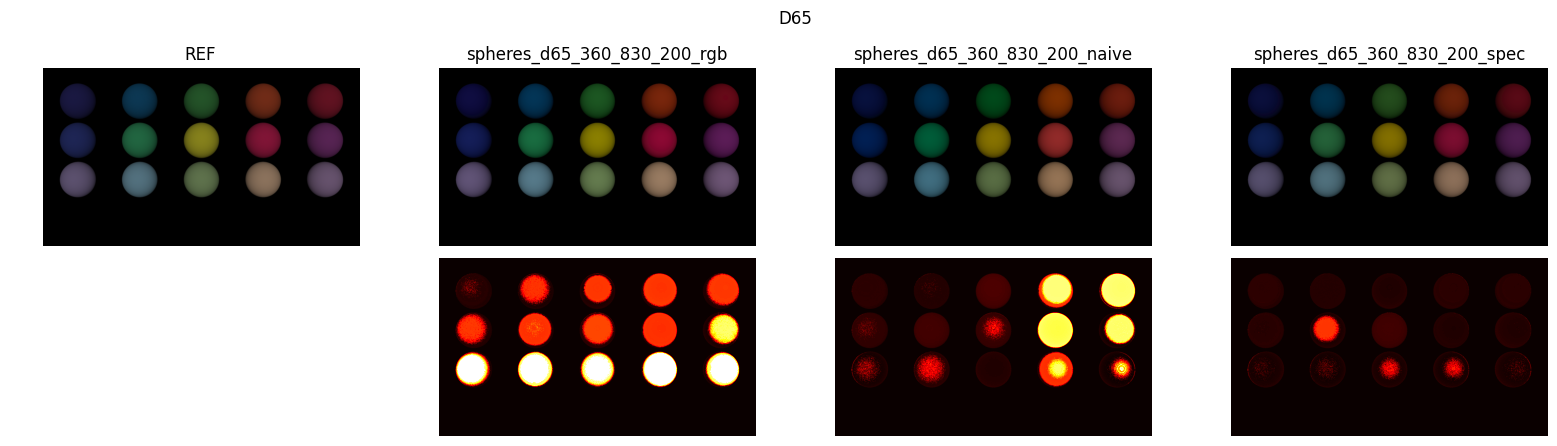

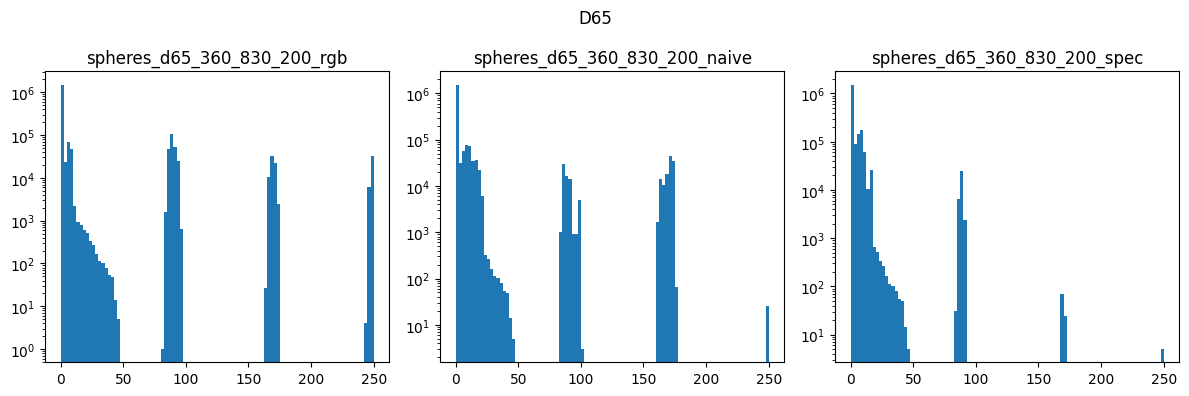

In [9]:
plot_cmp(images, ref_im_ldr, names, "D65")

plot_hist(images, ref_im_ldr, names, "D65")

# With blue led

In [ ]:

names = ["spheres_led_360_830_200_rgb", "spheres_led_360_830_200_naive", "spheres_led_360_830_200_spec"]

images = [load_image(os.path.join(im_path, f"{name}.png")) for name in names]


ref = "mi_LED.exr"
ref_path = os.path.join(im_path, ref)
ref_im = load_exr(ref_path)


ref_im_ldr = hdr_to_ldr(ref_im, exposure=15) 
#np.power((ref_im * 255), 1.0/2.2)

print(ref_im.shape, ref_im.dtype, ref_im.max())
print(ref_im_ldr.shape, ref_im_ldr.dtype, ref_im_ldr.max(),np.median(ref_im_ldr[ref_im_ldr>0]))
print(images[0].shape, images[0].dtype, images[0].max(), np.median(images[0][images[0]>0]))


In [ ]:
plot_cmp(images, ref_im_ldr, names, "LED")


In [ ]:
# # Plot a histogram of the error values:

# aspect = ref_im.shape[1]/ref_im.shape[0]
# fig, axs = plt.subplots(2, 4, figsize=(16, 8/aspect))  

# for i, im in enumerate(images):
#     error = np.abs(ref_im_ldr - im)
#     error = np.mean(error, axis=-1)
#     axs[0, i].hist(error.flatten(), bins=100, range=(0, 200))
#     axs[0, i].set_title(names[i])
#     axs[1, i].hist(error.flatten(), bins=100, range=(0, 200))
#     axs[1, i].set_yscale("log")
#     # axs[0, i ].axis("off")
#     # axs[1, i ].axis("off")
plot_hist(images, ref_im_ldr, names, "LED")
